In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import numpy as np

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    stratify=cancer.target
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [12]:
# knn
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9460093896713615
0.916083916083916


In [13]:
# gradient boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.958041958041958


In [14]:
# random forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9440559440559441


In [15]:
from pandas import DataFrame


depth_numbers = list(range(1, 15))
lr_numbers = [0.1, 0.01, 0.001]

depth_list = []
lr_list = []
train_score = []
test_score = []

for d in depth_numbers:
    for lr in lr_numbers:
        model = GradientBoostingClassifier(
            learning_rate=lr,
            max_depth=d,
            random_state=0
        )
        model.fit(X_train, y_train)

        depth_list.append(d)
        lr_list.append(lr)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

data = {
    'depth': depth_list,
    'lr': lr_list,
    'train': train_score,
    'test': test_score
}
df = DataFrame(data)
df

,depth,lr,train,test
0,1,0.100,0.995305,0.965035
1,1,0.010,0.941315,0.916084
2,1,0.001,0.626761,0.629371
3,2,0.100,1.000000,0.937063
4,2,0.010,0.969484,0.930070
5,2,0.001,0.626761,0.629371
6,3,0.100,1.000000,0.958042
7,3,0.010,0.995305,0.944056
8,3,0.001,0.626761,0.629371
9,4,0.100,1.000000,0.937063


In [17]:
max_test = df.loc[df['test'] == df['test'].max()]
max_test

,depth,lr,train,test
0,1,0.1,0.995305,0.965035


In [18]:
model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=1,
    random_state=0
)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9953051643192489
0.965034965034965


In [21]:
model.feature_importances_

array([0.        , 0.00108535, 0.        , 0.        , 0.        ,
       0.        , 0.00448723, 0.16116909, 0.        , 0.        ,
       0.00032322, 0.        , 0.        , 0.00391946, 0.00130933,
       0.        , 0.00056072, 0.        , 0.        , 0.        ,
       0.13376914, 0.01960883, 0.32001366, 0.05572526, 0.00436345,
       0.        , 0.00654754, 0.28573837, 0.00137936, 0.        ])

In [30]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
    plt.figure(figsize=(15, 15))
    imp = model.feature_importances_     # feature의 중요도 
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정 

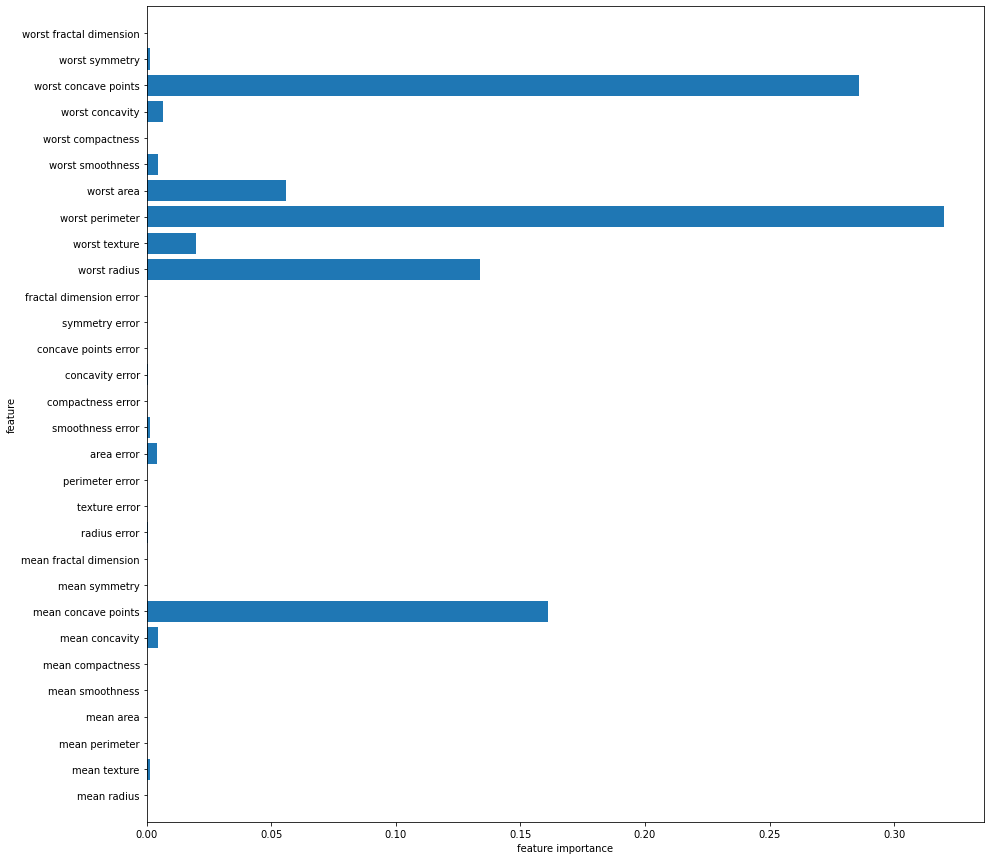

In [31]:
feature_names = cancer.feature_names   #  선택된 피처의 이름
n_features = X.shape[1]  # 선택된 피처의 개수
plot_feature_important_up(model, n_features, feature_names) # 피처의 중요도 확인